In [2]:
!pip install yfinance

In [3]:
# prompt: pip install yfinance
import yfinance as yf




In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
# Download Amazon stock data
amazon = yf.Ticker("AMZN")
df = amazon.history(period="5y")  # Fetch last 5 years of data

# Display first few rows
print(df.head())



                                Open       High        Low      Close  \
Date                                                                    
2020-03-09 00:00:00-04:00  88.693001  93.138496  88.064499  90.030502   
2020-03-10 00:00:00-04:00  93.543999  94.713501  90.908501  94.591003   
2020-03-11 00:00:00-04:00  92.892502  93.566002  90.074997  91.042999   
2020-03-12 00:00:00-04:00  86.098999  88.250000  83.750000  83.830498   
2020-03-13 00:00:00-04:00  87.750000  89.315498  84.030998  89.250000   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-03-09 00:00:00-04:00  156264000        0.0           0.0  
2020-03-10 00:00:00-04:00  142666000        0.0           0.0  
2020-03-11 00:00:00-04:00  112496000        0.0           0.0  
2020-03-12 00:00:00-04:00  226924000        0.0           0.0  
2020-03-13 00:00:00-04:00  176194000        0.0           0.0  


In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values if any
#df.dropna(inplace=True)


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


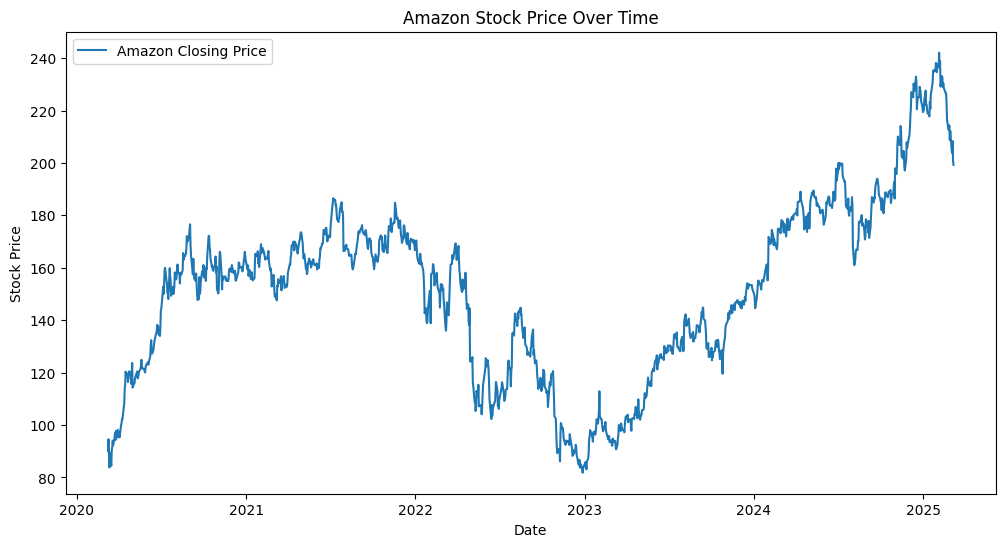

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Amazon Closing Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Amazon Stock Price Over Time")
plt.legend()
plt.show()


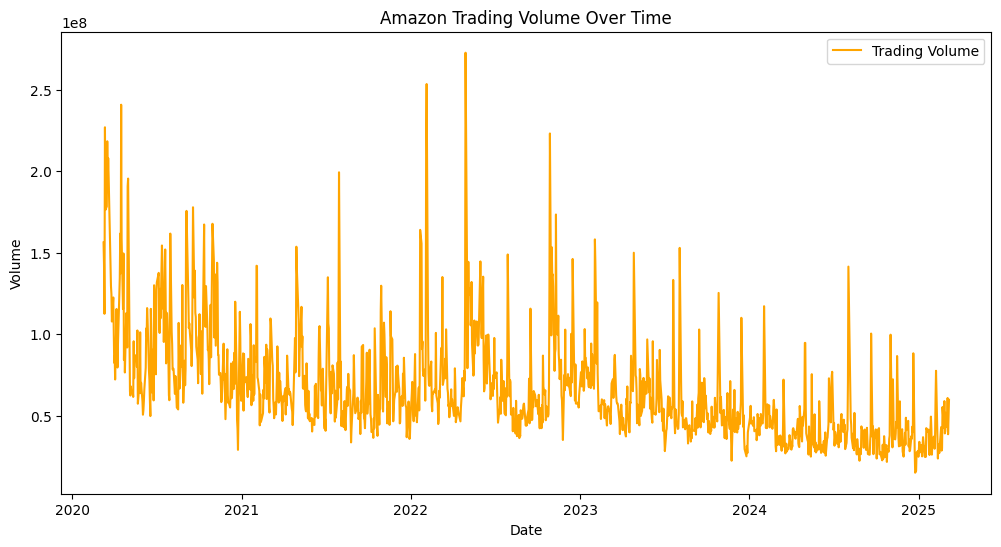

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Volume'], color='orange', label="Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Amazon Trading Volume Over Time")
plt.legend()
plt.show()



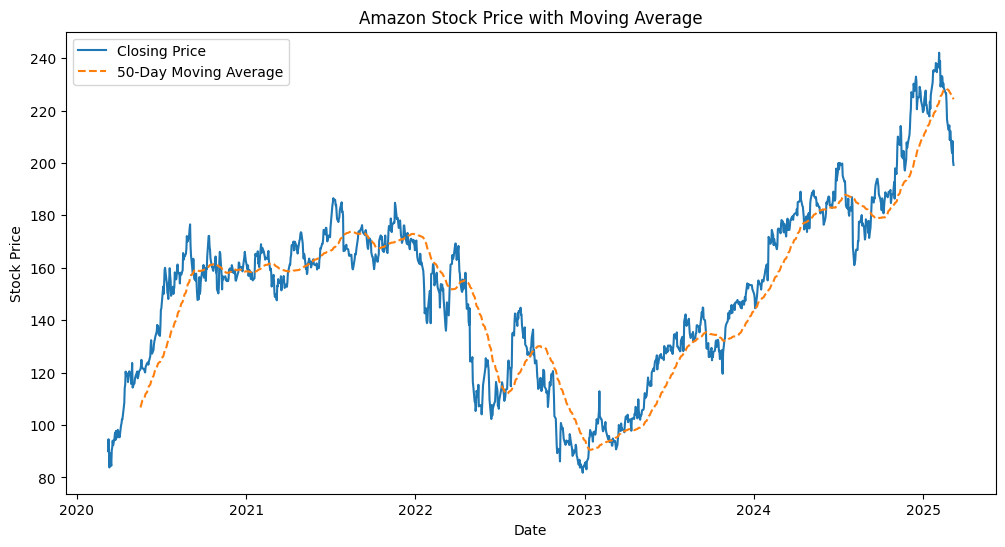

In [9]:
df['50_MA'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Closing Price")
plt.plot(df.index, df['50_MA'], label="50-Day Moving Average", linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Amazon Stock Price with Moving Average")
plt.legend()
plt.show()


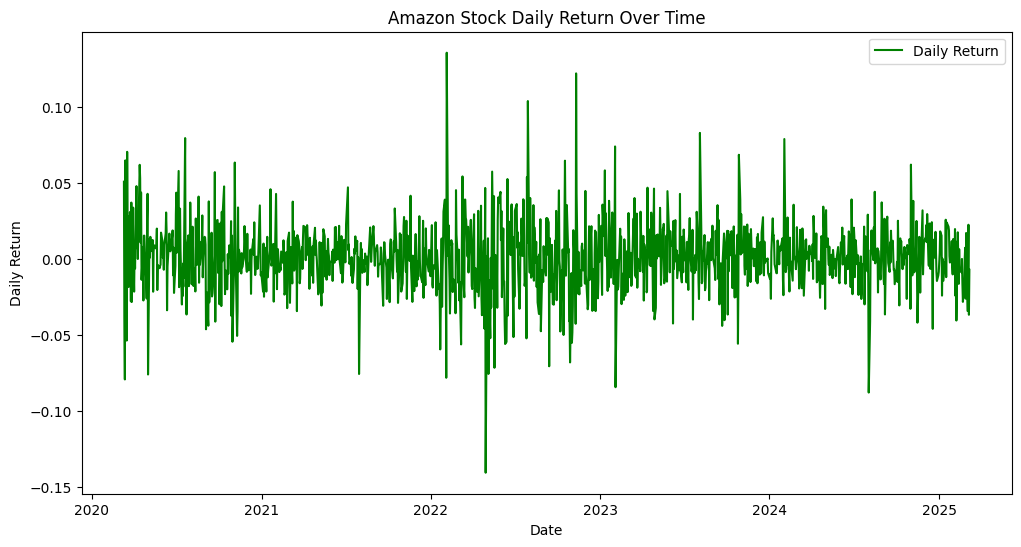

In [10]:
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Daily Return'], color='green', label="Daily Return")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Amazon Stock Daily Return Over Time")
plt.legend()
plt.show()


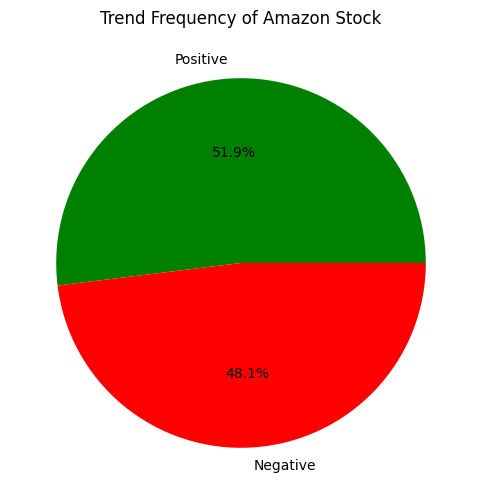

In [11]:
df['Trend'] = np.where(df['Daily Return'] > 0, 'Positive', 'Negative')

# Count trend occurrences
trend_counts = df['Trend'].value_counts()

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Trend Frequency of Amazon Stock")
plt.show()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


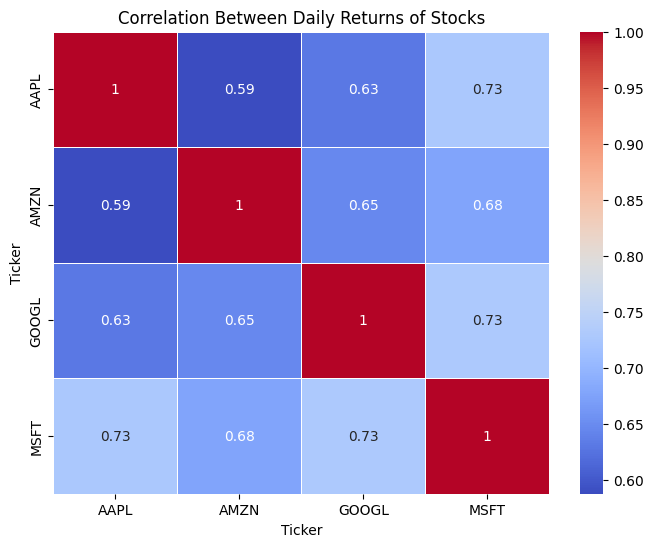

In [12]:
# Fetch multiple stocks
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN"]
data = yf.download(tickers, period="5y")['Close']

# Calculate daily returns
returns = data.pct_change()

# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Daily Returns of Stocks")
plt.show()
